In [1]:
import disentangler as dt
from disentangler.dependencies import *

from scipy.stats import fisher_exact

In [2]:
rna_data = dt.bonemarrow.utils.load_GEX_data()

In [3]:
sc.tl.pca(rna_data, use_highly_variable=True, n_comps = 50)

In [2]:
mira_model = mira.topics.load_model(dt.bonemarrow.config.MIRA_RNA + '2')

/liulab/alynch/projects/batcheffect-env/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/liulab/alynch/projects/batcheffect-env/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu


In [42]:
ontology = set('LRRC25	TYROBP	MPEG1	CD14	SGSH	FGR	LILRB1	LILRB2	NCF2	SLC11A1	F5	FCER1G	MNDA	PTPRJ	HCK	CD93	MAFB	P2RY13	TLR2	S100A9	S100A8	CD101	PTAFR	TLR4	FGL2	PILRA	ALOX5	GIMAP4	C3AR1	CLEC4E	CLEC1B	CLEC12A	CLEC7A	LILRA5	LILRB3	LILRA6	C5AR1	RASGRP4	KCNE3	IGSF6	ITGAM	ITGAX	IFITM3	IFI30	HMOX1	NOD2	ACPP	ICAM1	IL10RA	CCR1	CYBB	VSIG4	CFP	TLR8	IPCEF1	SGK1	PRF1	HAL	GAS7	CXCL16	ADAP2	CD300E	SLC26A11	SLC24A4	GPR65	AOAH	HK3	LGALS3	SLC7A7	DOK2	NFAM1	FYB	BCL6	NLRC4	FPR1	LST1	IER3	TREM1	LRG1	MS4A7	SLC15A3	SIRPB1	VNN2	HES4	SERPINA1	SIRPB2	FCGR2A	SIGLEC9	CR1	FCGR1A	FCGR2C	FCGR1B	APOBR	GNLY	LILRA1	CD1D	MS4A6A	LYZ	FCN1	SIGLEC7	MCEMP1	FCGR3A	S100A12	MS4A14	HELZ2	ADGRE1'\
    .strip().split('\t')).intersection(
        set(mira_model.features)
)

AA = len(set(mira_model.get_top_genes(13, 200)).intersection(
    set(ontology)
))

AB = 200 - AA
BA = len(ontology) - AA
BB = len(mira_model.features) - 200 - BA

conting_matrix = [[AA, AB],[BA, BB]]

conting_matrix

[[22, 178], [13, 3239]]

In [43]:
fisher_exact(conting_matrix, alternative='greater')

(30.7942955920484, 1.4963441997818437e-19)

In [5]:
mira_model.predict(rna_data)
mira_model.get_umap_features(rna_data, box_cox=0.1)

Predicting latent vars:   0%|          | 0/247 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added key to obsm: X_topic_compositions
INFO:mira.adata_interface.topic_model:Added cols: topic_0, topic_1, topic_2, topic_3, topic_4, topic_5, topic_6, topic_7, topic_8, topic_9, topic_10, topic_11, topic_12, topic_13, topic_14, topic_15, topic_16, topic_17, topic_18, topic_19, topic_20, topic_21
INFO:mira.adata_interface.core:Added key to varm: topic_feature_compositions
INFO:mira.adata_interface.core:Added key to varm: topic_feature_activations
INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm
INFO:mira.adata_interface.core:Added key to obsm: X_umap_features


In [6]:
sc.pp.neighbors(rna_data, use_rep = 'X_pca')
sc.tl.umap(rna_data, min_dist = 0.1, negative_sample_rate = 3)
rna_data.obsm['PCA_umap'] = rna_data.obsm['X_umap'].copy()

In [7]:
sc.pp.neighbors(rna_data, use_rep = 'X_umap_features', metric = 'manhattan')
sc.tl.umap(rna_data, min_dist = 0.1, negative_sample_rate = 3)

# Plotting UMAPs

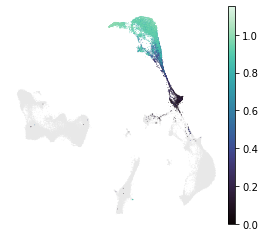

In [87]:
fig, ax = plt.subplots(1,1,figsize=(4.3,4))
sc.pl.umap(rna_data, ax = ax, color = 'GEX_pseudotime_order', na_color='#e8e8e8',
          color_map='mako', frameon=False, title = '', vmax = 1.15, show = False)
plt.savefig('figure1/GEX_pseudotime_umap.png', dpi = 300, bbox_inches = 'tight')

In [64]:
b = sns.diverging_palette(40, 200, s=80, l = 55,n=6)

edge_palette = {
      '1' : 'lightgrey',#sns.color_palette('Purples')[1], 
      '3' : b[2], 
      '2' : sns.color_palette('RdBu')[-3],
      'Mono' : b[0],
      'B cell' : sns.color_palette('RdBu')[-1],
      'NK' : sns.color_palette('RdBu')[-2],
      'pDC' : b[1], 
}

In [71]:
from collections import defaultdict

frankencell_colormap = defaultdict(lambda : 'black',
    {
        'NK' : edge_palette['NK'],
        'B1 B' : edge_palette['B cell'],
        'pDC' : edge_palette['pDC'],
        'cDC2' : edge_palette['pDC'],
        'CD16+ Mono' : edge_palette['Mono'],
        'CD8+ T' : edge_palette['NK'],
        'HSC' : edge_palette['1'],
    }
)
    

/liulab/alynch/projects/batcheffect-env/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


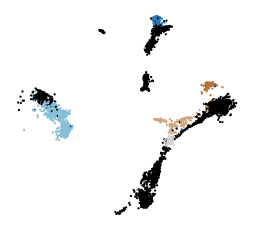

In [85]:
fig, ax = plt.subplots(1,1,figsize=(4.3,4))
sc.pl.embedding(rna_data[rna_data.obs.batch == 's4d1'], color = 'cell_type', palette=frankencell_colormap,
           frameon=False, ax = ax, legend_loc='none', title = '', basis = 'PCA_umap',
               s = 20, show=False)

plt.savefig('figure2/s4d1_celltype_umap.png', dpi = 300, bbox_inches = 'tight')

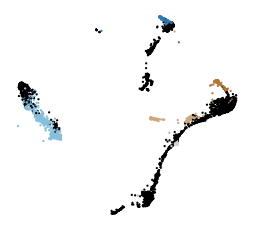

In [86]:
fig, ax = plt.subplots(1,1,figsize=(4.3,4))
sc.pl.embedding(rna_data[rna_data.obs.batch == 's3d10'], color = 'cell_type', palette=frankencell_colormap,
           frameon=False, ax = ax, legend_loc='none', title = '', basis = 'PCA_umap',
               s = 20, show = False)
plt.savefig('figure2/s3d10_celltype_umap.png', dpi = 300, bbox_inches = 'tight')

# Figure 1 celltype plot

/liulab/alynch/projects/batcheffect-env/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator


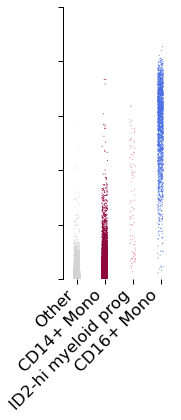

In [119]:
from collections import defaultdict

mono_map = defaultdict(lambda : 'Other', {
    'CD16+ Mono' : 'CD16+ Mono',
    'CD14+ Mono' : 'CD14+ Mono',
    'ID2-hi myeloid prog' : 'ID2-hi myeloid prog'
})

rna_data.obs['mono_celltype'] = rna_data.obs.cell_type.map(mono_map)

fig, ax = plt.subplots(1,1,figsize=(2,5))
order = ['Other','CD14+ Mono','ID2-hi myeloid prog','CD16+ Mono']
pal = dt.bonemarrow.colors.CELL_PALETTE
sns.stripplot(
    data = rna_data.obs,
    x = 'mono_celltype',
    s = 1,
    y = 'topic_13',
    order= order,
    palette=[pal[t] if t in pal else 'lightgrey' for t in order],
    ax = ax,
)

for side in ['right','bottom','top']:
    ax.spines[side].set_visible(False)

ax.set(ylim = (0,1), xlabel = '', ylabel = '')
ax.set_xticklabels(order, rotation = 45, ha = 'right')
ax.set_yticklabels([''*5])

ax.spines['left'].set_linewidth(1)
ax.tick_params(width=1, length = 5)

plt.savefig('figure1/CD16_mono_topic_13_composition.png', dpi = 300, bbox_inches = 'tight')

# DE genes

In [8]:
sc.tl.rank_genes_groups(rna_data, 'cell_type', use_raw=False,
                        groups=['CD16+ Mono'], method='wilcoxon')

df = sc.get.rank_genes_groups_df(rna_data, group='CD16+ Mono').set_index('names').join(
    pd.DataFrame(rna_data.varm['topic_feature_activations'], index = rna_data.var_names)[13]
)

df['-pval'] = -np.log10(df.pvals_adj)

/liulab/alynch/projects/batcheffect-env/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


[(-6.0, 6.0),

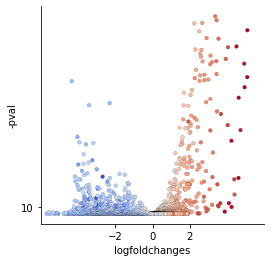

In [9]:
fig, ax = plt.subplots(1,1,figsize=(4,4,))
ax = sns.scatterplot(
    ax = ax,
    data = df[~df[13].isna()],
    x = 'logfoldchanges',
    y = '-pval',
    hue = 13, 
    hue_norm=(-4,4),
    palette='coolwarm',
    s = 15,
    edgecolor = 'black',
    linewidth = 0.1,
    legend=False,
)
sns.despine()

ax.set(xlim = (-6,6), yticks = [10], xticks = [-2,0,2])
#plt.savefig('figure1/volcano_plot.png', bbox_inches = 'tight', dpi = 300)

In [10]:
signature = "MPEG1	MCEMP1	TYROBP	DOK2	CLEC4E	CD300E	S100A9	S100A8	FCN1	IFITM3	FGL2	C3AR1	GIMAP4	GPR65	NOD2	CXCL16	ALOX5	MS4A14	SLC26A11	HES4	S100A12	SLC15A3	SLC11A1	CD93	CYBB	IPCEF1	MAFB	ADAP2	VNN2	LST1	MS4A7	KCNE3	NCF2	C5AR1	PRF1	CD1D	IFI30	CFP	ICAM1	RASGRP4	HELZ2	LGALS3	HMOX1	CD14	IER3	CCR1	LRRC25	IL10RA	NFAM1	PILRA	LILRB1	LILRB2	LILRB3	LYZ	TLR2	SLC7A7	FCGR2A	HAL	BCL6	TLR8	GAS7	SIGLEC9	FCGR2C	TLR4	SIGLEC7	SGK1	IGSF6	SERPINA1	FPR1	NLRC4	TREM1	PTPRJ	HK3	SIRPB2	SIRPB1	FCGR3A	ADGRE1	CLEC7A	FCER1G	P2RY13	CR1	LRG1	F5	HCK	FGR	MS4A6A	APOBR	MNDA	CD101	ACPP	SLC24A4	CLEC12A	PTAFR	AOAH	LILRA1	ITGAM	SGSH	LILRA5	LILRA6	FYB	GNLY	CLEC1B	FCGR1A	ITGAX	VSIG4	FCGR1B"\
    .split('\t')

signature = df.index.intersection(signature)

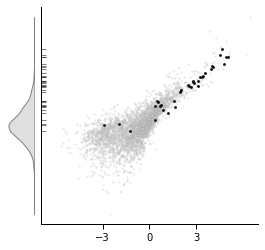

In [18]:
fig, ax = plt.subplots(1,2,figsize=(4.5,4,), gridspec_kw={'width_ratios' : [0.5,4], 'wspace' : 0.05})
sns.scatterplot(
    ax = ax[1],
    data = df[~df[13].isna()],
    x = 'logfoldchanges',
    y = 13,
    color = 'lightgrey',
    s = 3,
    edgecolor = 'black',
    linewidth = 0.05,
    alpha = 0.5,
    legend=False,
    #alpha = 0.2,
)

sns.scatterplot(
    ax = ax[1],
    data = df.loc[signature],
    x = 'logfoldchanges',
    y = 13,
    color = 'black',
    s = 7,
    edgecolor = 'black',
    linewidth = 0.1,
    legend=False,
)

sns.rugplot(data = df.loc[signature], y = 13, color = 'black', linewidth = 0.5,
           ax = ax[1])
sns.despine()

sns.kdeplot(data=df, y=13, ax = ax[0], fill = 'lightgrey',color = 'grey',)

ax[1].set(xlim = (-7,7), yticks = [10], xticks = [-3,0,3],
      xlabel = '',ylabel = '')
ax[0].axes.invert_xaxis()
ax[0].axis('off')

for s in ['left','bottom']:
    for a in ax:
        a.spines[s].set_linewidth(1)
        a.tick_params(width=1, length = 5)
    
plt.savefig('figure1/lfc_vs_beta.png', dpi = 300, bbox_inches = 'tight')

In [52]:
df.loc[signature].sort_values(13,ascending=False).head()

,scores,logfoldchanges,pvals,pvals_adj,13,-pval
names,,,,,,
LST1,40.943985,4.672899,0.000000e+00,0.000000e+00,4.384528,inf
SERPINA1,34.207859,4.512286,1.847659e-256,1.594530e-254,3.965882,253.797367
MS4A7,44.323055,5.023700,0.000000e+00,0.000000e+00,3.852629,inf
MAFB,32.394466,4.928371,3.284251e-230,2.222987e-228,3.844950,227.653063
FCGR3A,45.746136,4.806087,0.000000e+00,0.000000e+00,3.408162,inf


## Enrichment

CD14-low, CD16-positive monocyte - Bone Marrow	4.564e-23	7.774e-21	29.01	1492.29

# Figure 2 celltype plot

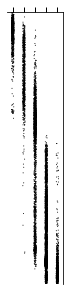

In [9]:
fig, ax = plt.subplots(1,1,figsize=(1,5))
order = ['HSC','MK/E prog','Proerythroblast','Erythroblast','Normoblast']
pal = dt.bonemarrow.colors.CELL_PALETTE
sns.stripplot(
    data = rna_data[~rna_data.obs.GEX_pseudotime_order.isna()].obs,
    x = 'cell_type',
    s = 1,
    alpha = 1.,
    y = 'GEX_pseudotime_order',
    order= order,
    #palette=pal,
    color='black',
    ax = ax,
)

for side in ['left','bottom',]:
    ax.spines[side].set_visible(False)

ax.set(ylim = (0,1), xlabel = '', ylabel = '', yticks = [])
ax.set_xticklabels(order, rotation = 45, ha = 'right')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.xaxis.tick_top()

ax.spines['left'].set_linewidth(1)
ax.tick_params(width=1, length = 5)
ax.axes.invert_yaxis()
plt.savefig('figure1/fragment_plot_celltype_striplot.png', dpi = 300, bbox_inches = 'tight')

### old celltype plot

In [3]:
subset_data = rna_data[~rna_data.obs.GEX_pseudotime_order.isna()]
subset_data.obs['cell_order' ] = subset_data.obs_vector('GEX_pseudotime_order').argsort().argsort()
subset_data.obs.cell_type.cat.categories

fig, ax = plt.subplots(1,1,figsize=(5,0.25))

plot_data = subset_data[np.random.choice(subset_data.n_obs, size = 1000)]
for cell_type in ['HSC', 'MK/E prog', 'Proerythroblast', 'Erythroblast', 'Normoblast']:
    cell_df = plot_data.obs[plot_data.obs.cell_type == cell_type]
    sns.scatterplot(
        data = cell_df ,
        x = 'cell_order',
        color = dt.bonemarrow.colors.CELL_PALETTE[cell_type],
        s = 35,
        alpha = 0.7,
        y = 0 + np.random.rand(cell_df.shape[0]),
        legend=False,
        linewidth = 0.1,
        edgecolor = 'black',
        #hue = 'cell_type',
        #palette= list(dt.bonemarrow.colors.CELL_PALETTE.values()),
        #hue_order= dt.bonemarrow.colors.CELL_PALETTE.keys()
    )
ax.set_ymargin(0.5)
ax.axis('off')
#plt.savefig('figure1/fragment_plot_celltype.png',
#           bbox_inches = 'tight', dpi = 300)

/liulab/alynch/projects/batcheffect-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  


(-459.55, 10486.55, -0.4993532734312959, 1.499529195299719)